<a href="https://colab.research.google.com/github/randiijulian/Final-Project-Kelompok-02-Rauzan-Sumara/blob/main/%5BRevisi%5D_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mobile Price Classification

Nama:
1.   Randi Julian Saputra


install kaggle untuk import dataset pada kaggle

In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d iabhishekofficial/mobile-price-classification
!ls

Saving kaggle.json to kaggle.json
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 39.9MB/s]
kaggle.json  mobile-price-classification.zip  sample_data


In [ ]:
import zipfile
local_zip = '/content/mobile-price-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

##Import Library

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Code you have previously used to load data
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

##EDA (Exploratory Data Analysis)

In [ ]:
iowa_file_path = '/content/train.csv'
home_data = pd.read_csv(iowa_file_path)
home_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
home_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
home_data.shape

(2000, 21)

In [ ]:
home_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
home_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
home_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [ ]:
#membagi data menjadi numeric features dan categorical features
categorical_features=list()
numeric_features=list()
for column_name in home_data.columns:
    unique_values = len(home_data[column_name].unique())
    if unique_values<30:
      categorical_features.append(column_name)
    else:
      numeric_features.append(column_name)

In [ ]:
categorical_features

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [ ]:
numeric_features

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

Melakukan check data null pada dataset

In [ ]:
home_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

###Data Cleansing

In [ ]:
#Mengecek outlier
import scipy.stats as stats #mengimport library scipy
home_data[(np.abs(stats.zscore(home_data["price_range"])) >= 3)] #Mengecek outliers kolom price_range dari data train.csv

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom battery_power
1 = home_data["battery_power"].quantile(0.25)
q3 = home_data["battery_power"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["battery_power"] < fence_low) | (home_data["battery_power"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom clock_speed
q1 = home_data["clock_speed"].quantile(0.25)
q3 = home_data["clock_speed"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["clock_speed"] < fence_low) | (home_data["clock_speed"] > fence_high)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom int_memory
q1 = home_data["int_memory"].quantile(0.25)
q3 = home_data["int_memory"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["int_memory"] < fence_low) | (home_data["int_memory"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom m_dep
q1 = home_data["m_dep"].quantile(0.25)
q3 = home_data["m_dep"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["m_dep"] < fence_low) | (home_data["m_dep"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom mobile_wt
q1 = home_data["mobile_wt"].quantile(0.25)
q3 = home_data["mobile_wt"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["mobile_wt"] < fence_low) | (home_data["mobile_wt"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom n_cores
q1 = home_data["n_cores"].quantile(0.25)
q3 = home_data["n_cores"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["n_cores"] < fence_low) | (home_data["n_cores"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom pc
q1 = home_data["pc"].quantile(0.25)
q3 = home_data["pc"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["pc"] < fence_low) | (home_data["pc"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom px_width
q1 = home_data["px_width"].quantile(0.25)
q3 = home_data["px_width"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["px_width"] < fence_low) | (home_data["px_width"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom ram
q1 = home_data["ram"].quantile(0.25)
q3 = home_data["ram"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["ram"] < fence_low) | (home_data["ram"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom sc_h
q1 = home_data["sc_h"].quantile(0.25)
q3 = home_data["sc_h"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["sc_h"] < fence_low) | (home_data["sc_h"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom sc_w
q1 = home_data["sc_w"].quantile(0.25)
q3 = home_data["sc_w"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["sc_w"] < fence_low) | (home_data["sc_w"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek outlier kolom talk_time
q1 = home_data["talk_time"].quantile(0.25)
q3 = home_data["talk_time"].quantile(0.75)

iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

home_data.loc[(home_data["talk_time"] < fence_low) | (home_data["talk_time"] > fence_high)] 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
#Mengecek apakah ada data yang duplikat
home_data.duplicated().sum()

0

###Visualize

Text(0.5, 1.0, 'Correlation ')

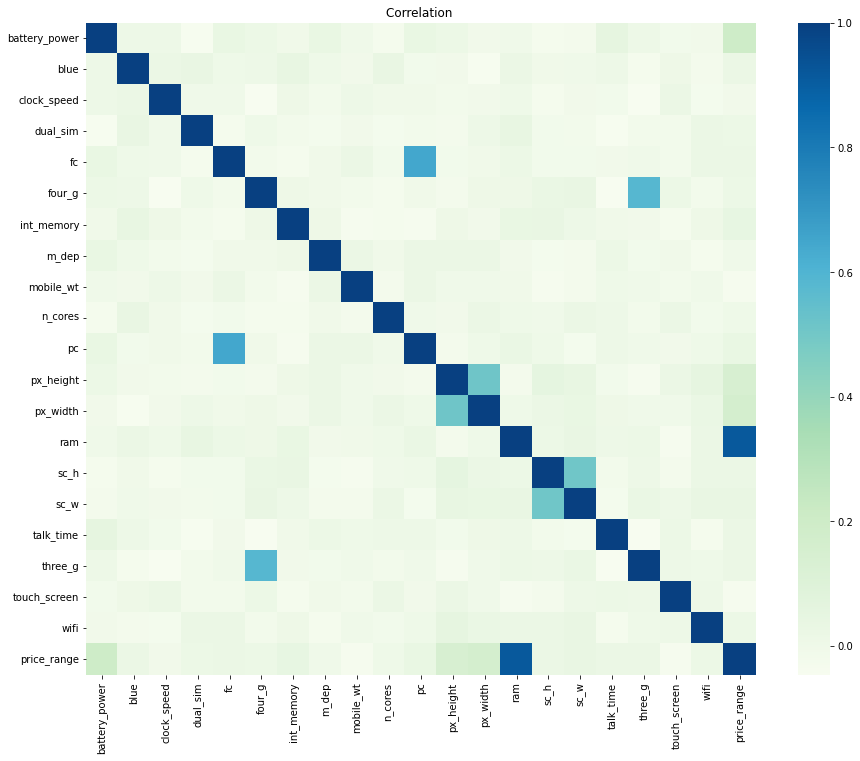

In [ ]:
#membuat correlation map
corr=home_data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='GnBu')
r.set_title("Correlation ")

price_range memiliki korelasi terhadap ram, px_width, px_height,dan battery power

In [ ]:
# #Analysis to check Outlier in Numeric Features
# i = 1
# plt.figure(figsize=(20,30))
# for feature in numeric_features:
#     plt.title("Checking for Outliers")
#     plt.subplot(6,3,i)
#     sns.set_palette("deep")
#     sns.boxplot(x='price_range' , y=feature, data=home_data)
#     i+=1

####Check Outlier in Numeric Features

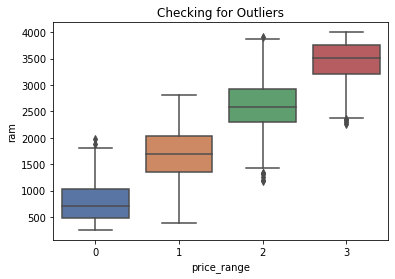

In [ ]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='ram', data = home_data, palette="deep")

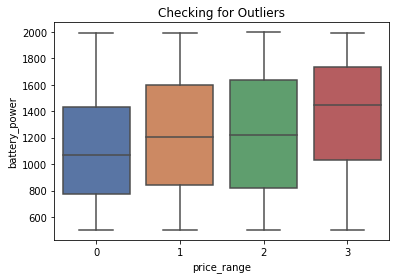

In [ ]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='battery_power', data = home_data, palette="deep")

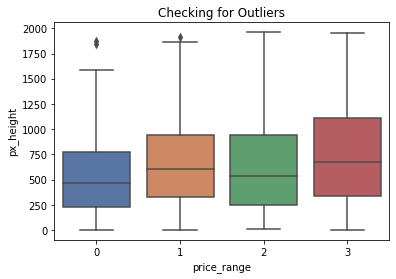

In [ ]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='px_height', data = home_data, palette="deep")

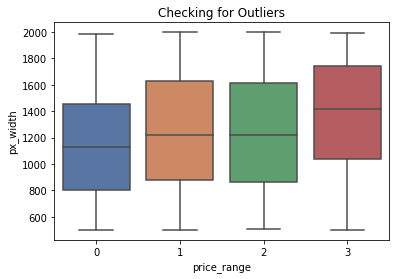

In [ ]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='px_width', data = home_data, palette="deep")

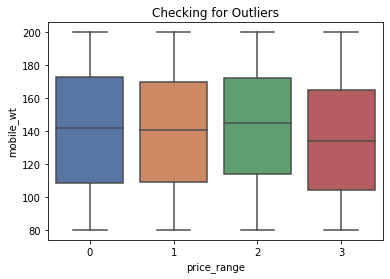

In [ ]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='mobile_wt', data = home_data, palette="deep")

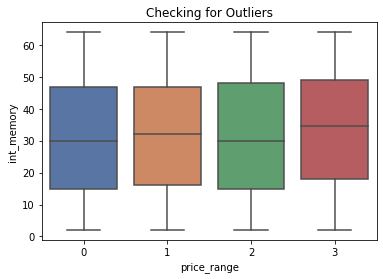

In [ ]:
plt.title("Checking for Outliers")
sns.boxplot(x='price_range' , y='int_memory', data = home_data, palette="deep")

####Membuat plot histogram in Numeric Features

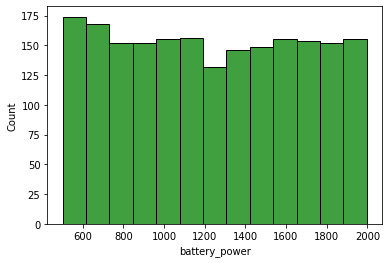

In [ ]:
ax = sns.histplot(data = home_data, x='battery_power', color='green') #membuat plot histogram battery_power sepanjang sumbu x
plt.show() #menampilkan visualisasi

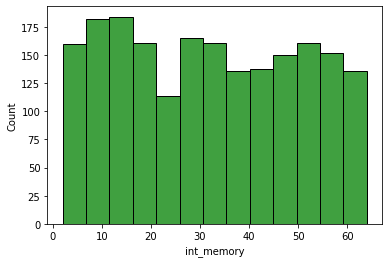

In [ ]:
ax = sns.histplot(data = home_data, x='int_memory', color='green') #membuat plot histogram int_memory sepanjang sumbu x
plt.show() #menampilkan visualisasi

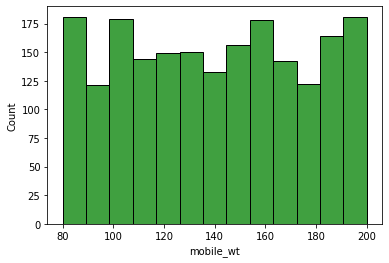

In [ ]:
ax = sns.histplot(data = home_data, x='mobile_wt', color='green') #membuat plot histogram mobile_wt sepanjang sumbu x
plt.show() #menampilkan visualisasi

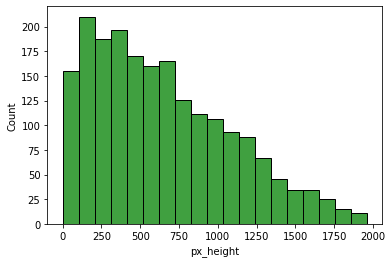

In [ ]:
ax = sns.histplot(data = home_data, x='px_height', color='green') #membuat plot histogram px_height sepanjang sumbu x
plt.show() #menampilkan visualisasi

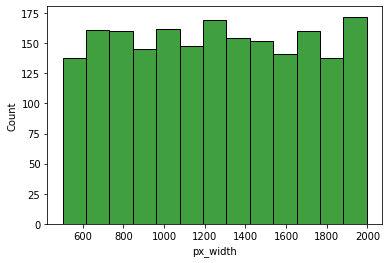

In [ ]:
ax = sns.histplot(data = home_data, x='px_width', color='green') #membuat plot histogram px_width sepanjang sumbu x
plt.show() #menampilkan visualisasi

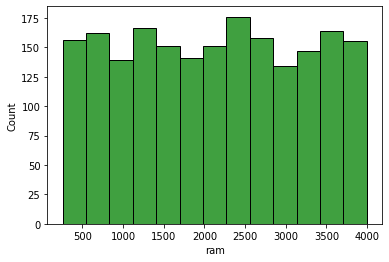

In [ ]:
ax = sns.histplot(data = home_data, x='ram', color='green') #membuat plot histogram ram sepanjang sumbu x
plt.show() #menampilkan visualisasi

##Modeling

splitting dataset

In [ ]:
y = home_data["price_range"].values
x_data=home_data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
# splitting data menjadi train & test with test size 20%
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [ ]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
816,0.203073,1.0,0.08,0.0,0.000000,0.0,1.000000,0.000000,0.141667,0.428571,0.70,0.327041,0.136182,0.043292,0.428571,0.333333,0.833333,0.0,1.0,1.0
790,0.273881,1.0,0.96,0.0,0.000000,0.0,0.709677,0.000000,0.841667,0.571429,0.05,0.235204,0.113485,0.028594,0.285714,0.277778,0.833333,0.0,1.0,0.0
361,0.265865,0.0,0.00,1.0,0.684211,1.0,0.887097,0.888889,0.766667,0.142857,0.90,0.402041,0.554740,0.028862,0.428571,0.055556,0.277778,1.0,1.0,0.0
592,0.509018,0.0,0.00,0.0,0.631579,0.0,1.000000,0.222222,0.791667,0.571429,0.90,0.090816,0.923231,0.247728,0.642857,0.166667,0.833333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,0.468938,1.0,0.00,1.0,0.000000,1.0,0.145161,0.888889,0.241667,0.142857,0.60,0.017857,0.006676,0.378407,0.857143,0.722222,0.944444,1.0,1.0,0.0
1096,0.436206,0.0,0.60,0.0,0.315789,1.0,0.532258,0.777778,0.658333,0.571429,0.80,0.511735,0.885848,0.803314,0.785714,0.833333,0.777778,1.0,0.0,0.0
1932,0.144957,1.0,0.44,1.0,0.052632,1.0,0.451613,0.333333,0.108333,0.285714,0.60,0.337755,0.331776,0.359433,0.357143,0.500000,0.555556,1.0,1.0,1.0
235,0.682699,1.0,0.52,0.0,0.315789,1.0,0.145161,0.000000,0.408333,0.000000,0.40,0.075510,0.738318,0.120524,1.000000,0.444444,0.944444,1.0,1.0,0.0


In [ ]:
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
674,0.356045,0.0,0.84,1.0,0.105263,1.0,0.693548,0.222222,0.916667,0.285714,0.20,0.092857,0.529372,0.190540,0.714286,0.055556,0.277778,1.0,0.0,0.0
1699,0.334669,1.0,0.52,0.0,0.052632,0.0,0.693548,0.666667,0.833333,0.857143,0.35,0.483673,0.338451,0.261358,1.000000,0.722222,0.888889,1.0,1.0,0.0
1282,0.072144,1.0,0.00,0.0,0.210526,1.0,0.129032,0.000000,0.008333,0.714286,0.30,0.057653,0.683578,0.440673,0.785714,0.166667,0.888889,1.0,1.0,1.0
1315,0.674015,0.0,0.04,1.0,0.052632,0.0,0.483871,0.666667,0.458333,0.285714,0.40,0.491327,0.680908,0.159808,0.214286,0.111111,0.444444,1.0,0.0,1.0
1210,0.203073,1.0,0.48,1.0,0.000000,1.0,0.903226,0.888889,0.733333,0.285714,0.50,0.041327,0.696929,0.839391,0.142857,0.333333,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.511022,0.0,0.56,1.0,0.000000,1.0,0.080645,0.111111,0.866667,0.285714,0.60,0.176531,0.646195,0.608231,0.357143,0.277778,0.111111,1.0,1.0,1.0
763,0.828323,1.0,0.52,0.0,0.000000,0.0,0.193548,0.666667,0.525000,1.000000,0.00,0.372449,0.931242,0.836718,0.428571,0.166667,0.055556,1.0,0.0,0.0
385,0.921176,1.0,0.52,0.0,0.210526,1.0,0.258065,0.666667,0.483333,0.285714,0.25,0.036224,0.132844,0.822288,0.857143,0.833333,0.277778,1.0,0.0,0.0
1667,0.979292,0.0,0.00,0.0,0.000000,1.0,0.709677,0.555556,0.991667,0.000000,0.35,0.264286,0.583445,0.350347,0.714286,0.111111,0.277778,1.0,1.0,0.0


###Naive Bayes

Modeling menggunakan Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
print("train accuracy:",GNB.score(x_train,y_train))
print("test accuracy:",GNB.score(x_test,y_test))

train accuracy: 0.826875
test accuracy: 0.7575


###Random Forest

Modeling menggunakan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200) 
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
print("train accuracy:",rfc.score(x_train,y_train))
print("test accuracy:",rfc.score(x_test,y_test))

train accuracy: 1.0
test accuracy: 0.875


###Decision Tree

Modeling menggunakan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("train accuracy:",dtree.score(x_train,y_train))
print("test accuracy:",dtree.score(x_test,y_test))

train accuracy: 1.0
test accuracy: 0.8375


##Evaluation

Melakukan evaluasi pada model yang telah dibuat

In [ ]:
y_gnb = GNB.predict(x_test)
y_rfc = rfc.predict(x_test)
y_dtree = dtree.predict(x_test)

In [ ]:
#mengimport accuracy_score dari sklearn.metrics
from sklearn.metrics import accuracy_score 
acc_gnb = accuracy_score(y_test, y_gnb)
acc_rfc = accuracy_score(y_test, y_rfc)
acc_dtree = accuracy_score(y_test, y_dtree)
print('Accuracy with Naive Bayes : ', acc_gnb)
print('Accuracy with Random Forest :', acc_rfc)
print('Accuracy with Decision Tree :', acc_dtree)

Accuracy with Naive Bayes :  0.7575
Accuracy with Random Forest : 0.875
Accuracy with Decision Tree : 0.8375


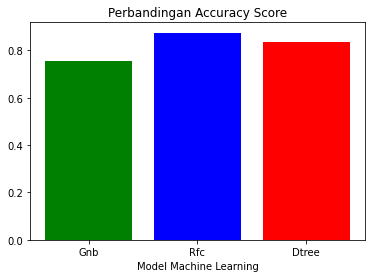

In [ ]:
#menampilkan grafik dari accuracy_score
x = [0, 1, 2]
y = [acc_gnb, acc_rfc, acc_dtree]

fig,ax = plt.subplots()

ax.bar(x, y, align='center', color=['green', 'blue', 'red'])

ax.set_title('Perbandingan Accuracy Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(('Gnb', 'Rfc', 'Dtree'))

plt.show()

In [ ]:
#mengimport precision_score dari sklearn.metrics
from sklearn.metrics import precision_score 
pre_gnb = precision_score(y_test, y_gnb, average='macro')
pre_rfc = precision_score(y_test, y_rfc, average='macro')
pre_dtree = precision_score(y_test, y_dtree, average='macro')
print('Precision with Naive Bayes : ', pre_gnb)
print('Precision with Random Forest :', pre_rfc)
print('Precision with Decision Tree :', pre_dtree)

Precision with Naive Bayes :  0.7636188618861885
Precision with Random Forest : 0.8771602538626313
Precision with Decision Tree : 0.8423561106110611


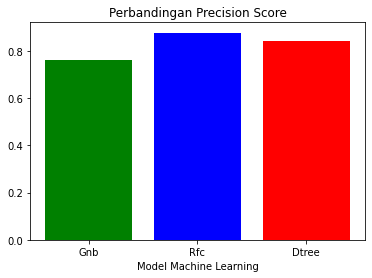

In [ ]:
#menampilkan grafik dari precision_score
x = [0, 1, 2]
y = [pre_gnb, pre_rfc, pre_dtree]

fig,ax = plt.subplots()

ax.bar(x, y, align='center', color=['green', 'blue', 'red'])

ax.set_title('Perbandingan Precision Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(('Gnb', 'Rfc', 'Dtree'))

plt.show()

In [ ]:
#mengimport recall_score dari sklearn.metrics
from sklearn.metrics import recall_score 
recal_gnb = recall_score(y_test, y_gnb, average='macro')
recal_rfc = recall_score(y_test, y_rfc, average='macro')
recal_dtree = recall_score(y_test, y_dtree, average='macro')
print('Recall with Naive Bayes : ', recal_gnb)
print('Recall with Random Forest :', recal_rfc)
print('Recall with Decision Tree :', recal_dtree)

Recall with Naive Bayes :  0.7591904224774405
Recall with Random Forest : 0.8758780250205086
Recall with Decision Tree : 0.839802091878589


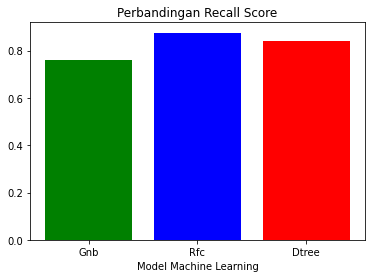

In [ ]:
#menampilkan grafik dari recall_score
x = [0, 1, 2]
y = [recal_gnb, recal_rfc, recal_dtree]

fig,ax = plt.subplots()

ax.bar(x, y, align='center', color=['green', 'blue', 'red'])

ax.set_title('Perbandingan Recall Score')
ax.set_xlabel('Model Machine Learning')

ax.set_xticks(x)
ax.set_xticklabels(('Gnb', 'Rfc', 'Dtree'))

plt.show()